In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,f1_score

In [ ]:
x_train=np.linspace(-1,1,20)
x_train

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [ ]:
y_train=np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [ ]:
x_test=np.linspace(-1, 1, 20)

In [ ]:
y_test=np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

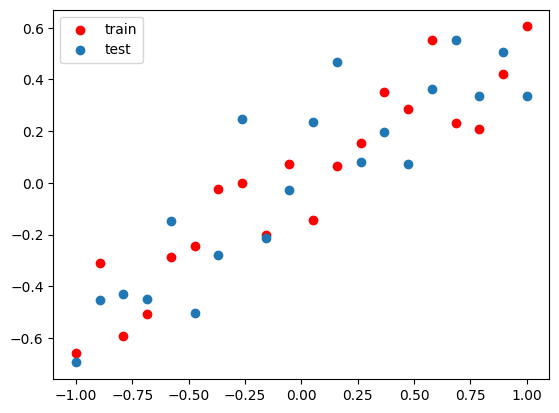

In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.scatter(x_test,y_test)
plt.legend(['train','test'])
plt.show()

**Regression** model

In [ ]:
model1=Sequential()
model1.add(Dense(128,input_dim=1,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='linear'))
adam=Adam(learning_rate=0.001)
model1.compile(loss='mse',optimizer='adam',metrics=['mse'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model1.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1503 - mse: 0.1503 - val_loss: 0.1307 - val_mse: 0.1307
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1183 - mse: 0.1183 - val_loss: 0.1041 - val_mse: 0.1041
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0818 - val_mse: 0.0818
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0703 - mse: 0.0703 - val_loss: 0.0642 - val_mse: 0.0642
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0531 - mse: 0.0531 - val_loss: 0.0511 - val_mse: 0.0511
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0402 - mse: 0.0402 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0213 - mse: 0.

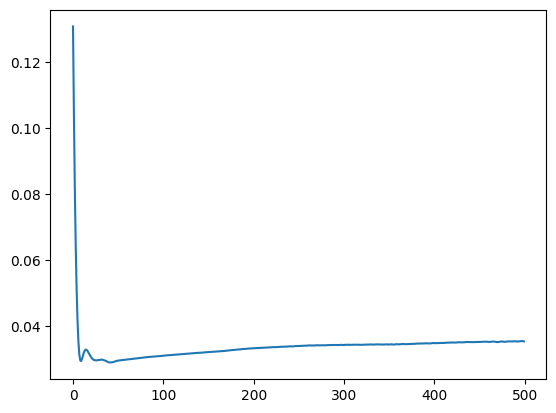

In [ ]:
plt.plot(history.history['val_loss'])

In [ ]:
y_pred=model1.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[-0.6093239 ],
       [-0.53975   ],
       [-0.47088975],
       [-0.4020295 ],
       [-0.30235183],
       [-0.20146596],
       [-0.10058005],
       [-0.00343094],
       [-0.19467409],
       [ 0.07134469],
       [-0.13418788],
       [ 0.04022914],
       [ 0.17678839],
       [ 0.31250042],
       [ 0.32946146],
       [ 0.34638208],
       [ 0.36330265],
       [ 0.3816231 ],
       [ 0.42992252],
       [ 0.47822183]], dtype=float32)

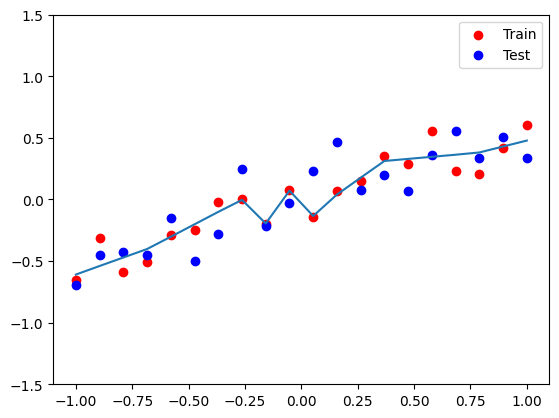

In [28]:
plt.figure()
plt.scatter(x_train, y_train, c='red', label='Train')
plt.scatter(x_test, y_test, c='blue', label='Test')
plt.plot(x_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

**Dropout**

In [29]:
model2=Sequential()
model2.add(Dense(128,input_dim=1,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='linear'))
adam=Adam(learning_rate=0.001)
model2.compile(loss='mse',optimizer='adam',metrics=['mse'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
history=model2.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1357 - mse: 0.1357 - val_loss: 0.1216 - val_mse: 0.1216
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.1087 - mse: 0.1087 - val_loss: 0.0998 - val_mse: 0.0998
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0845 - mse: 0.0845 - val_loss: 0.0819 - val_mse: 0.0819
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0855 - mse: 0.0855 - val_loss: 0.0671 - val_mse: 0.0671
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0601 - mse: 0.0601 - val_loss: 0.0553 - val_mse: 0.0553
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.0396 - val_mse: 0.0396
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0319 - mse: 

In [35]:
y_pred_2=model2.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


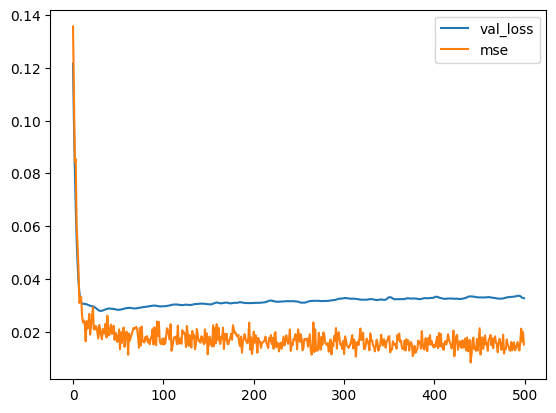

In [36]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['mse'])
plt.legend(['val_loss','mse'])


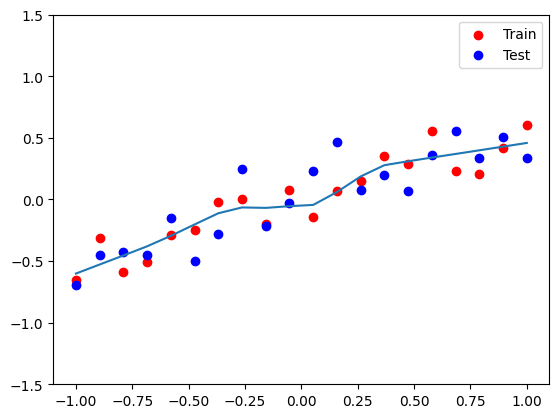

In [37]:
plt.figure
plt.figure()
plt.scatter(x_train, y_train, c='red', label='Train')
plt.scatter(x_test, y_test, c='blue', label='Test')
plt.plot(x_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()